In [39]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-potability/water_potability.csv


### Feature Description

ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [40]:
data=pd.read_csv('/kaggle/input/water-potability/water_potability.csv')
data=pd.DataFrame(data)

In [41]:
data.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


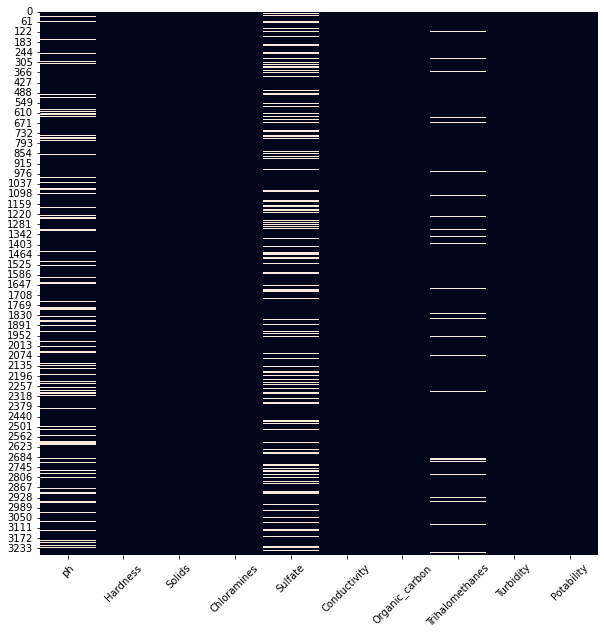

In [43]:
plt.figure(figsize=(10,10))
sns.heatmap(data.isnull(), cbar=False)
plt.xticks(rotation=45)
plt.show()

In [44]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [45]:
data['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

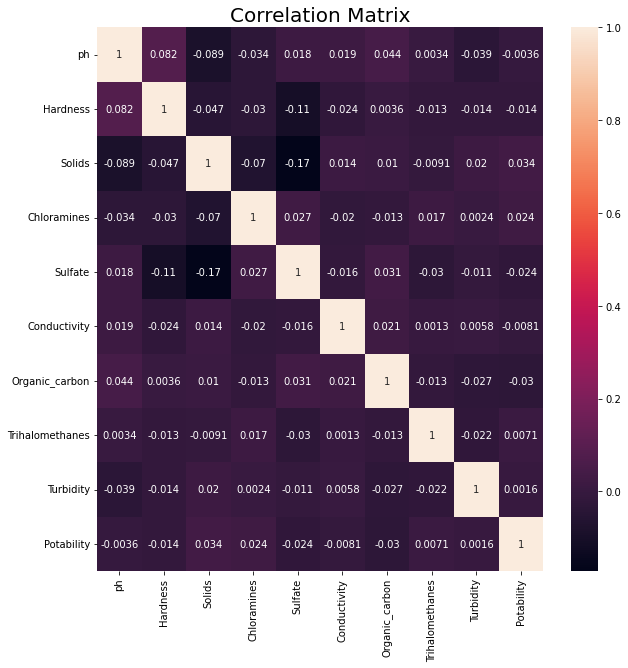

In [46]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Correlation Matrix', fontsize=20);

In [47]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


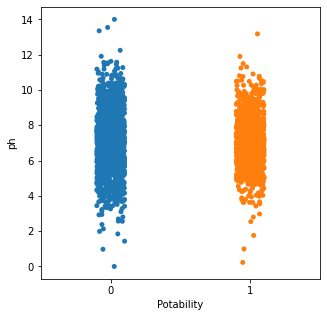

In [48]:
fig=plt.figure(figsize=(5,5))
sns.stripplot(y=data['ph'], x=data['Potability'])
plt.show()

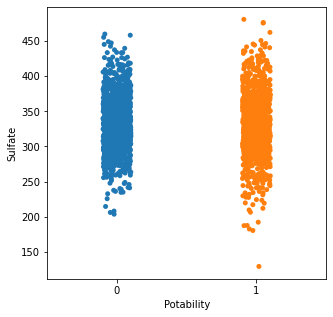

In [49]:
fig=plt.figure(figsize=(5,5))
sns.stripplot(y=data['Sulfate'], x=data['Potability'])
plt.show()

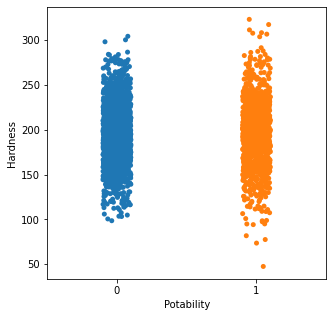

In [50]:
fig=plt.figure(figsize=(5,5))
sns.stripplot(y=data['Hardness'], x=data['Potability'])
plt.show()

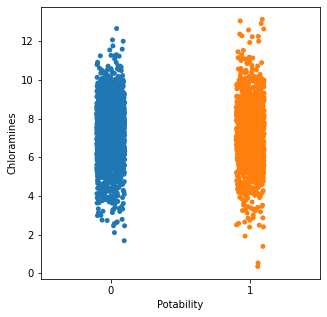

In [51]:
fig=plt.figure(figsize=(5,5))
sns.stripplot(y=data['Chloramines'], x=data['Potability'])
plt.show()

<Figure size 720x360 with 0 Axes>

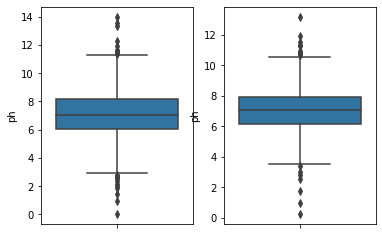

In [52]:
a=data.loc[data['Potability'] == 0, 'ph']
b=data.loc[data['Potability'] == 1, 'ph']
fig=plt.figure(figsize=(10,5))
fig, axes = plt.subplots(1, 2)
sns.boxplot(y=a, ax=axes[0])
sns.boxplot(y=b, ax=axes[1])
plt.show()

<Figure size 720x360 with 0 Axes>

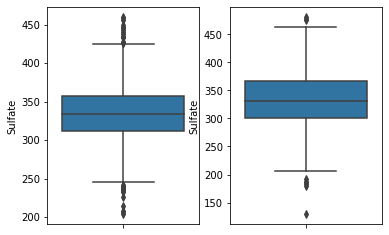

In [53]:
a=data.loc[data['Potability'] == 0, 'Sulfate']
b=data.loc[data['Potability'] == 1, 'Sulfate']
fig=plt.figure(figsize=(10,5))
fig, axes = plt.subplots(1, 2)
sns.boxplot(y=a, ax=axes[0])
sns.boxplot(y=b, ax=axes[1])
plt.show()

<Figure size 720x360 with 0 Axes>

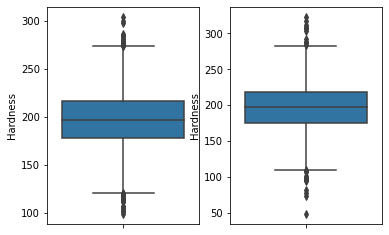

In [54]:
a=data.loc[data['Potability'] == 0, 'Hardness']
b=data.loc[data['Potability'] == 1, 'Hardness']
fig=plt.figure(figsize=(10,5))
fig, axes = plt.subplots(1, 2)
sns.boxplot(y=a, ax=axes[0])
sns.boxplot(y=b, ax=axes[1])
plt.show()

<Figure size 720x360 with 0 Axes>

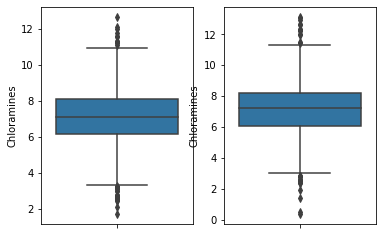

In [55]:
a=data.loc[data['Potability'] == 0, 'Chloramines']
b=data.loc[data['Potability'] == 1, 'Chloramines']
fig=plt.figure(figsize=(10,5))
fig, axes = plt.subplots(1, 2)
sns.boxplot(y=a, ax=axes[0])
sns.boxplot(y=b, ax=axes[1])
plt.show()

# 결측치 처리(ph, Sulfate, Trihalomethanes)

- 1. dropna(null값을 포함한 데이터는 drop한다) => 데이터가 1526개로 약 절반가량으로 줄어든다.=> RandomForest 정확도가 상대적으로 낮다
- 2. null값이 있는 column을 drop한다.=> feature가 9개에서 6개로 줄어든다.=> RamdomForest 정확도가 상대적으로 낮다
- 3. Feature의 평균값 또는 중앙값으로 대체한다.=> RandomForest 정확도가 상대적으로 높다.

In [192]:
# 결측치 평균값으로 대체-1

data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 0]['ph'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 1]['ph'].mean(skipna=True)


data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 0]['Sulfate'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 1]['Sulfate'].mean(skipna=True)


data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 0]['Trihalomethanes'].mean(skipna=True)
data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 1]['Trihalomethanes'].mean(skipna=True)

In [57]:
# 결측치 중앙값으로 대체-2

#data.loc[(data['Potability'] == 0) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 0]['ph'].median(skipna=True)
#data.loc[(data['Potability'] == 1) & (data['ph'].isna()), 'ph'] = data[data['Potability'] == 1]['ph'].median(skipna=True)


#data.loc[(data['Potability'] == 0) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 0]['Sulfate'].median(skipna=True)
#data.loc[(data['Potability'] == 1) & (data['Sulfate'].isna()), 'Sulfate'] = data[data['Potability'] == 1]['Sulfate'].median(skipna=True)


#data.loc[(data['Potability'] == 0) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 0]['Trihalomethanes'].median(skipna=True)
#data.loc[(data['Potability'] == 1) & (data['Trihalomethanes'].isna()), 'Trihalomethanes'] = data[data['Potability'] == 1]['Trihalomethanes'].median(skipna=True)

In [193]:
from sklearn.model_selection import train_test_split
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=0)

In [194]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

### Preprocessing

In [195]:
from sklearn.preprocessing import StandardScaler
sclaer=StandardScaler()
X_train=sclaer.fit_transform(X_train)
X_test=sclaer.transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [196]:
X_train=X_train.rename(columns={0:'ph', 1:'Hardness', 2:'Solids', 3:'Chloramines', 4:'Sulfate', 5:'Conductivity', 6:'Organic_carbon', 7:'Trihalomethanes', 8:'Turbidity'})
X_test=X_test.rename(columns={0:'ph', 1:'Hardness', 2:'Solids', 3:'Chloramines', 4:'Sulfate', 5:'Conductivity', 6:'Organic_carbon', 7:'Trihalomethanes', 8:'Turbidity'})

### Machine Learning
- Modeling

In [197]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2293, 9), (983, 9), (2293,), (983,))

In [199]:
# Turbidy featur 제외하기
X_train.drop(['Turbidity'],axis=1, inplace=True)
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes
0,0.002389,0.590192,1.612249,1.823152,-0.081945,1.628907,0.009030,0.960111
1,1.405106,0.100240,0.730974,0.231541,0.019651,0.347477,-0.434286,-0.149181
2,0.133899,-0.057857,-0.414323,-0.632822,0.302486,-0.282069,0.345711,0.658528
3,-1.085190,1.029412,-0.914315,1.564940,0.500025,0.203561,0.129960,-0.015176
4,0.002389,0.551545,-1.055934,-0.022840,-0.859731,-1.305412,0.337934,1.648979
...,...,...,...,...,...,...,...,...
2288,0.246149,-0.411345,-0.529986,-1.582697,0.048774,0.336680,-1.382443,0.882377
2289,-0.815255,1.304412,-0.155970,-0.489789,0.203138,-0.270353,1.397203,-0.170127
2290,-0.297555,-0.151125,-0.768532,-0.922034,0.019651,0.558603,0.339270,-0.631338
2291,0.407370,1.121235,0.204264,0.803325,0.019651,-2.372618,1.245869,-0.350018


In [200]:
X_test.drop(['Turbidity'],axis=1, inplace=True)
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes
0,0.706399,0.629149,1.865665,0.078596,-0.601490,-1.776921,-0.384049,0.759098
1,-0.215223,-0.520499,0.217995,-1.129117,-0.017805,0.441608,-0.225165,-0.376651
2,0.002389,-0.487138,-0.478952,-0.569118,0.448229,0.274497,-1.154342,-2.173608
3,0.427804,-0.547602,-0.390679,0.689424,0.028579,1.136359,-1.100994,-0.213564
4,-0.858159,-0.960557,0.931062,0.819411,0.015086,0.842678,0.707875,0.191450
...,...,...,...,...,...,...,...,...
978,0.739120,0.579485,-0.551917,1.030868,-0.400157,0.417153,-0.034561,-0.389106
979,1.211571,-0.240794,1.161424,3.768848,-4.152543,0.666110,-0.671376,0.701667
980,0.002389,-0.111996,-0.515202,0.360108,1.321933,0.532691,0.577765,0.083849
981,-0.764390,-0.297107,1.025554,0.095551,0.143019,-1.249603,-0.496902,0.361289


In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


models_acc = []
models_f1 = []
models = [DecisionTreeClassifier(), LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), GaussianNB(), SVC()]
for model in models:
    model.fit(X_train, y_train)    
    pred = model.predict(X_test)
    models_acc.append(accuracy_score(y_test, pred))
    models_f1.append(f1_score(y_test, pred))

In [202]:
Model_list = pd.DataFrame({
    'Model Accuracy': models_acc, 
    "Model Name": ['DecisionTreeClassifier','LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'GaussianNB', 'SVC'],
    "Model f1 score": models_f1
})
Model_list

,Model Accuracy,Model Name,Model f1 score
0,0.740590,DecisionTreeClassifier,0.648276
1,0.623601,LogisticRegression,0.015957
2,0.649034,KNeighborsClassifier,0.465116
3,0.803662,RandomForestClassifier,0.701700
4,0.611394,GaussianNB,0.305455
5,0.679552,SVC,0.395393


### Randomsearch

In [214]:
from sklearn.model_selection import RandomizedSearchCV

rfc = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators':[200, 400,600, 800],
    'max_depth':[10,12,14],
    'min_samples_leaf':[2],
    'min_samples_split':[8]
}

random_search = RandomizedSearchCV(rfc, 
                           param_distributions=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

In [215]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 12, 14],
                                        'min_samples_leaf': [2],
                                        'min_samples_split': [8],
                                        'n_estimators': [200, 400, 600, 800]},
                   scoring='accuracy')

In [216]:
random_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 12}

In [217]:
best_model = random_search.best_estimator_
accuracy_score(y_test, best_model.predict(X_test))

0.8077314343845371

In [218]:
pred=best_model.predict(X_test)

In [219]:
print("Accuracy:", accuracy_score(y_test, pred)*100,'%') 
print("Recall:", recall_score(y_test, pred)*100,'%') 
print('Precision:',precision_score(y_test, pred)*100, '%') 
print('f1 score:',f1_score(y_test, pred)*100, '%')

Accuracy: 80.77314343845372 %
Recall: 58.71313672922251 %
Precision: 86.22047244094489 %
f1 score: 69.85645933014354 %


In [220]:
fi=best_model.feature_importances_
fi=pd.Series(fi, index=X_train.columns)
fi

ph                 0.214449
Hardness           0.087525
Solids             0.084176
Chloramines        0.086914
Sulfate            0.332818
Conductivity       0.061139
Organic_carbon     0.064410
Trihalomethanes    0.068568
dtype: float64

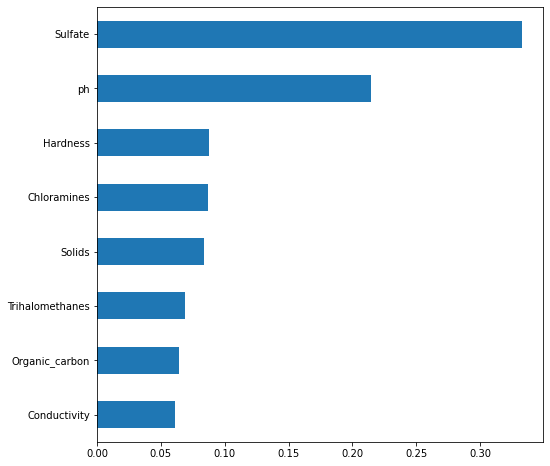

In [210]:
fi.sort_values().plot(kind='barh', figsize=(8,8))
plt.show()